In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from datetime import datetime

In [2]:
df_calendar = pd.read_csv('raw_data/calendar.csv')
df_listings = pd.read_csv('raw_data/listings.csv')
df_reviews = pd.read_csv('raw_data/reviews.csv')

# Preliminary analysis of the data

### calendar

In [3]:
# Change date type and create month filed
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['month'] = df_calendar['date'].dt.to_period('M')

# create a priced df
priced_df_calendar = df_calendar[~df_calendar['price'].isna()]
priced_df_calendar['price'] = priced_df_calendar['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype('float')

<ipython-input-3-5a1a452c6ff0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priced_df_calendar['price'] = priced_df_calendar['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype('float')


In [4]:
priced_df_calendar[0:3]

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,2016-01
1,241032,2016-01-05,t,85.0,2016-01
9,241032,2016-01-13,t,85.0,2016-01


Average price month


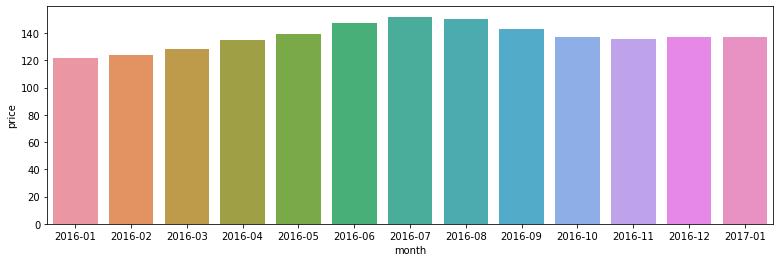

In [5]:
plt.figure(figsize=(13, 4))
sns.barplot(data=priced_df_calendar.groupby(by='month', as_index=False).mean(),x='month', y='price')

print('Average price month')

Amount of rented units


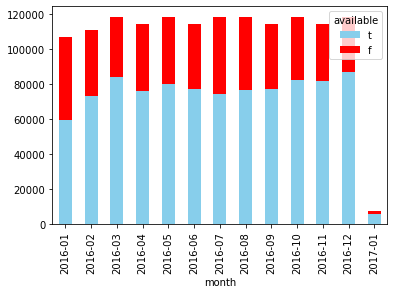

In [6]:
df_piv = df_calendar.groupby(by=['available','month'], as_index=False).count().pivot(columns='available',values='listing_id',index='month').reset_index()
df_piv.plot(kind='bar', stacked=True, color=['skyblue', 'red'],x='month',y=['t','f'])
print('Amount of rented units')

Amount of un-rented units


<AxesSubplot:xlabel='month'>

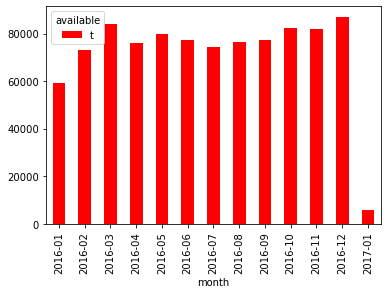

In [7]:
print('Amount of un-rented units')
df_piv.plot(kind='bar', stacked=True, color=['red'],x='month',y=['t'])

Amount of un-rented units


<AxesSubplot:xlabel='month'>

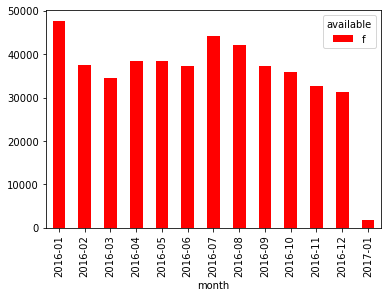

In [8]:
print('Amount of un-rented units')
df_piv.plot(kind='bar', stacked=True, color=['red'],x='month',y=['f'])

In [9]:
# hold the data of listing, the date and price
df_calendar[0:3]

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,2016-01
1,241032,2016-01-05,t,$85.00,2016-01
2,241032,2016-01-06,f,NaN,2016-01


In [10]:
df_calendar.info()nunique

SyntaxError: invalid syntax (<ipython-input-10-89ad7e23e7f0>, line 1)

In [11]:
print('Perentage of priced listing: {}%'.format(round(934542/1393570,2)))

Perentage of priced listing: 0.67%


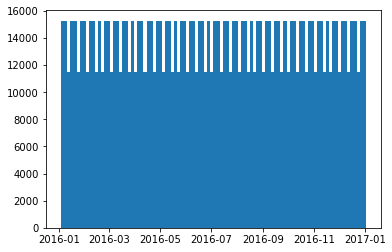

In [12]:
plt.hist(pd.to_datetime(df_calendar['date']), bins=100)
plt.show()

In [13]:
# only priced listing
priced_df_calendar = df_calendar[~df_calendar['price'].isna()]
priced_df_calendar['price'] = priced_df_calendar['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype('float')

<ipython-input-13-575b5cbbb8d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priced_df_calendar['price'] = priced_df_calendar['price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype('float')


Amount of listing below 300$ is: 0.9345668787491627


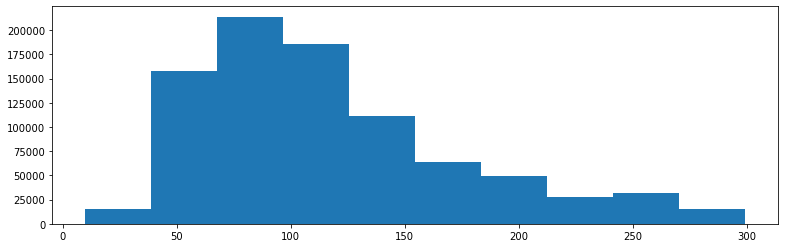

In [14]:
plt.figure(figsize=(13, 4))
plt.hist(priced_df_calendar[priced_df_calendar['price']<300]['price'],bins=10)
plt.plot()
print('Amount of listing below 300$ is: {}'.format(len(priced_df_calendar[priced_df_calendar['price']<300]['price'])/934542))

Amount of listing above 300$ is: 0.0654331212508373


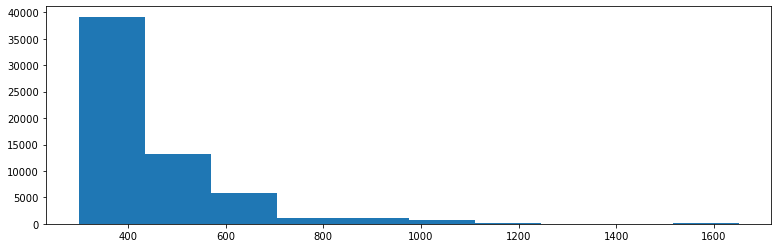

In [15]:
plt.figure(figsize=(13, 4))
plt.hist(priced_df_calendar[priced_df_calendar['price']>=300]['price'],bins=10)
plt.plot()
print('Amount of listing above 300$ is: {}'.format(len(priced_df_calendar[priced_df_calendar['price']>=300]['price'])/934542))

### listings

In [16]:
# listing genral info like number of rooms etc
df_listings[0:3]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [17]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [18]:
score_column = df_listings.columns[df_listings.columns.str.contains('score')]

In [19]:
score_corr = df_listings[score_column].corr()

<AxesSubplot:>

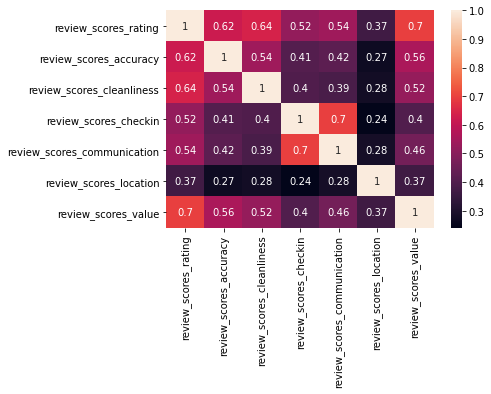

In [26]:
sns.heatmap(score_corr, annot=True)

In [21]:
df_listings['review_scores_rating']

0        95.0
1        96.0
2        97.0
3         NaN
4        92.0
        ...  
3813     80.0
3814    100.0
3815      NaN
3816      NaN
3817      NaN
Name: review_scores_rating, Length: 3818, dtype: float64

### reviews

In [22]:
# reviews of listings
df_reviews[0:3]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [23]:
# Change date type and create month filed
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews['month'] = df_reviews['date'].dt.to_period('M')

In [24]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id             84849 non-null  int64         
 2   date           84849 non-null  datetime64[ns]
 3   reviewer_id    84849 non-null  int64         
 4   reviewer_name  84849 non-null  object        
 5   comments       84831 non-null  object        
 6   month          84849 non-null  period[M]     
dtypes: datetime64[ns](1), int64(3), object(2), period[M](1)
memory usage: 4.5+ MB
